Following tutorial: https://www.youtube.com/watch?v=w8yWXqWQYmU&list=PLTrKz3Y5klryvoND_AXKYvp_gNITmoT62&index=1
Building a neural network only using numpy and pandas

In [1]:
import numpy as np
import pandas as pd

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [4]:
# def init_params():
#     W1 = np.random.rand(10, 784) - 0.5
#     b1 = np.random.rand(10, 1) - 0.5
#     W2 = np.random.rand(10, 10) - 0.5
#     b2 = np.random.rand(10, 1) - 0.5
#     return W1, b1, W2, b2

def init_params():
    W1 = np.random.normal(size=(10, 784)) * np.sqrt(1./(784))
    b1 = np.random.normal(size=(10, 1)) * np.sqrt(1./10)
    W2 = np.random.normal(size=(10, 10)) * np.sqrt(1./20)
    b2 = np.random.normal(size=(10, 1)) * np.sqrt(1./(784))
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [5]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print(f"Iteration {i}, accuracy: {round(100*get_accuracy(get_predictions(A2), Y), 5)}%")
    return W1, b1, W2, b2

In [6]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration 0, accuracy: 8.15854%
Iteration 10, accuracy: 26.79024%
Iteration 20, accuracy: 37.17317%
Iteration 30, accuracy: 53.89268%
Iteration 40, accuracy: 67.15122%
Iteration 50, accuracy: 72.64634%
Iteration 60, accuracy: 76.52927%
Iteration 70, accuracy: 79.17805%
Iteration 80, accuracy: 80.9561%
Iteration 90, accuracy: 82.19756%
Iteration 100, accuracy: 83.20488%
Iteration 110, accuracy: 83.98293%
Iteration 120, accuracy: 84.58049%
Iteration 130, accuracy: 85.09512%
Iteration 140, accuracy: 85.60732%
Iteration 150, accuracy: 85.97317%
Iteration 160, accuracy: 86.31463%
Iteration 170, accuracy: 86.62683%
Iteration 180, accuracy: 86.90244%
Iteration 190, accuracy: 87.11951%
Iteration 200, accuracy: 87.33659%
Iteration 210, accuracy: 87.52683%
Iteration 220, accuracy: 87.70732%
Iteration 230, accuracy: 87.86341%
Iteration 240, accuracy: 88.00244%
Iteration 250, accuracy: 88.12683%
Iteration 260, accuracy: 88.26341%
Iteration 270, accuracy: 88.38537%
Iteration 280, accuracy: 88.46341

In [7]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


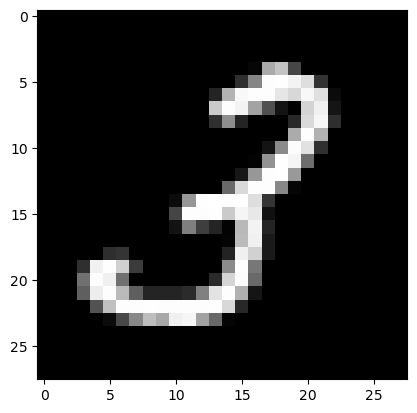

Prediction:  [3]
Label:  3


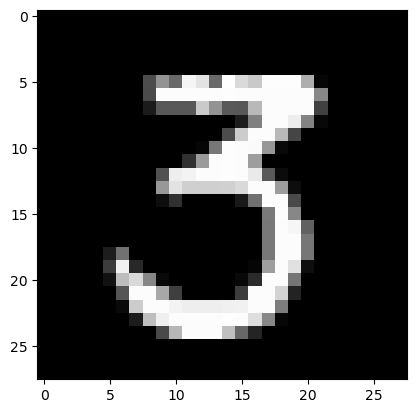

Prediction:  [4]
Label:  4


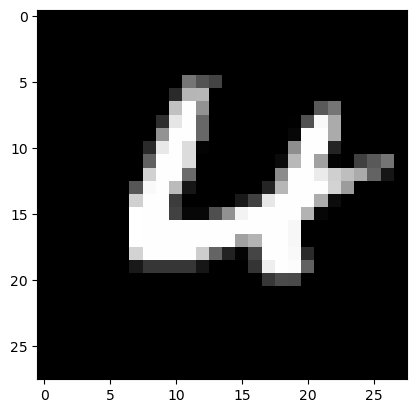

Prediction:  [7]
Label:  7


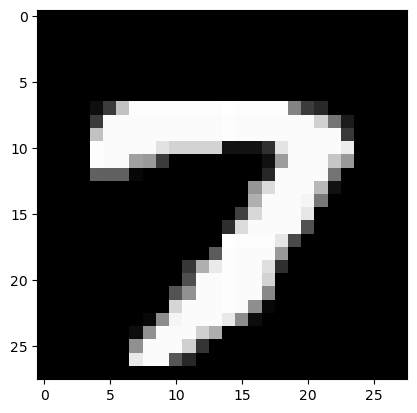

In [8]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [9]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

0.883